In [147]:
#any doubt click shift + tab
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [3]:
sms = pd.read_csv("SMSSpamCollection - SMSSpamCollection.csv.csv")

In [4]:
sms

,spam/not spam,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
sms_ham = sms[sms['spam/not spam'] == 'ham']
sms_spam = sms[sms['spam/not spam'] == 'spam']

In [6]:
sms_degrade = sms_ham.sample(sms_spam.shape[0])

In [7]:
sms_balanced = pd.concat([sms_degrade,sms_spam])
print(f"\n{sms_balanced.shape},\n{sms_balanced['spam/not spam'].value_counts()}")


(1494, 2),
spam/not spam
ham     747
spam    747
Name: count, dtype: int64


In [18]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(sms_balanced['Text'],sms_balanced['spam/not spam'],test_size=0.2, random_state=42)

# SVM

In [16]:
# we are converting text into vector number ( see Term Frequency-Inverse Document Frequency) this makes svm model to point the points of words in a graph =)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(sms_balanced['Text'])
y = sms_balanced['spam/not spam']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [20]:
y_pred = model.predict(X_test)

In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.939799331103679
              precision    recall  f1-score   support

         ham       0.89      0.99      0.94       145
        spam       0.99      0.89      0.94       154

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.95      0.94      0.94       299



# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
modelrf = RandomForestClassifier(n_estimators=50)
modelrf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [74]:
modelrf.score(X_test,y_test)

0.939799331103679

# Logistic Regression

In [75]:
# we need a dependent variable and not a spam/not spam column for Logistic regression
#soo ..

In [76]:
sms_lg = sms_balanced.copy(deep=True)

In [79]:
print(sms_lg.shape,sms_lg['spam/not spam'].value_counts())

(1494, 2) spam/not spam
ham     747
spam    747
Name: count, dtype: int64


In [80]:
sms_lg['spam'] = sms_lg['spam/not spam'].apply(lambda x: 1 if x == 'spam' else 0)

In [81]:
sms_lg

,spam/not spam,Text,spam
3265,ham,I will send them to your email. Do you mind &...,0
2839,ham,Were trying to find a Chinese food place aroun...,0
1260,ham,We have sent JD for Customer Service cum Accou...,0
5298,ham,I.ll hand her my phone to chat wit u,0
2733,ham,How dare you stupid. I wont tell anything to y...,0
...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [83]:
sms_lg.drop(columns = ['spam/not spam'],inplace=True)

In [84]:
sms_lg

,Text,spam
3265,I will send them to your email. Do you mind &...,0
2839,Were trying to find a Chinese food place aroun...,0
1260,We have sent JD for Customer Service cum Accou...,0
5298,I.ll hand her my phone to chat wit u,0
2733,How dare you stupid. I wont tell anything to y...,0
...,...,...
5537,Want explicit SEX in 30 secs? Ring 02073162414...,1
5540,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5547,Had your contract mobile 11 Mnths? Latest Moto...,1
5566,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [113]:
#converting the text into number as logestic regression works with number and not text
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(sms_lg['Text'])
y = sms_lg['spam']

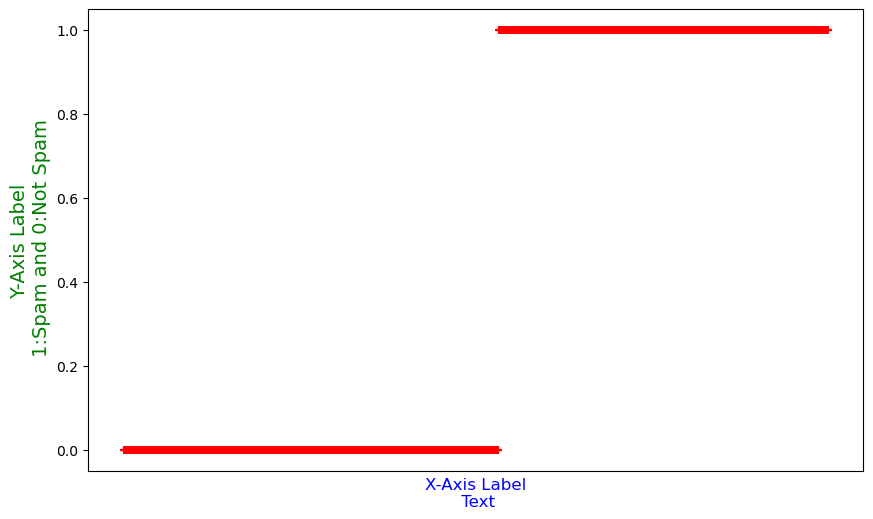

In [139]:
# This tells the notebook to show plots
%matplotlib inline 

import warnings
import matplotlib.pyplot as plt

# This hides the font warnings
warnings.filterwarnings("ignore", message="Glyph .* missing from font(s) DejaVu Sans.")

# Set the figure size
plt.figure(figsize=(10, 6))

# Your plot
plt.scatter(sms_lg.Text, sms_lg.spam, marker='+', color='red')
plt.xlabel("X-Axis Label\n Text", fontdict={'fontsize': 12, 'color': 'blue'})
plt.ylabel("Y-Axis Label\n 1:Spam and 0:Not Spam", fontdict={'fontsize': 14, 'color': 'green'})

# --- ADD THIS LINE ---
# This hides all the crowded text labels on the x-axis
plt.xticks([]) 

# This displays your final plot
plt.show()

In [95]:
from sklearn.model_selection import train_test_split

In [131]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.5) #train we use 90% and test we use 10%

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
modellg = LogisticRegression()
modellg.fit(X_train,y_train)

LogisticRegression()

In [134]:
modellg.predict(X_test)

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,

In [140]:
modellg.score(X_test,y_test)

0.9344042838018741

In [141]:
# more accurate 
modellg.predict_proba(X_test)

array([[0.23405287, 0.76594713],
       [0.70106202, 0.29893798],
       [0.38186933, 0.61813067],
       ...,
       [0.13234465, 0.86765535],
       [0.83405973, 0.16594027],
       [0.30011917, 0.69988083]], shape=(747, 2))

# Gradient Boosting

In [192]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [193]:
sms_balanced

,spam/not spam,Text
3265,ham,I will send them to your email. Do you mind &...
2839,ham,Were trying to find a Chinese food place aroun...
1260,ham,We have sent JD for Customer Service cum Accou...
5298,ham,I.ll hand her my phone to chat wit u
2733,ham,How dare you stupid. I wont tell anything to y...
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [194]:
sms_gb = sms_balanced.copy(deep=True)

In [195]:
sms_gb['spam/not spam'].value_counts()

spam/not spam
ham     747
spam    747
Name: count, dtype: int64

In [196]:
sms_gb['spam/not spam'] = sms_gb['spam/not spam'].map({'spam': 1, 'ham': 0})

In [234]:
X_train, X_test, y_train, y_test = train_test_split(sms_gb['Text'], sms_gb['spam/not spam'], train_size=0.80, random_state=42)

In [235]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [236]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_tfidf, y_train)

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [16:25:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [237]:
y_pred = model.predict(X_test_tfidf)

In [238]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [239]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9298
Precision: 0.9854
Recall: 0.8766
F1 Score: 0.9278
